In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

dfs = []
directory_path = "data/qqq-options-data-2020-2022"

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)
        dfs.append(pd.read_csv(data_path, low_memory=False))

df_raw = pd.concat(dfs)
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

data/qqq-options-data-2020-2022/qqq_2020_2022.csv


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,-0.00005,0.02035,,,0.000000,1 x 1,163.160000,163.380000,160.0,0.000000,0.010000,0 x 591,0.020000,-0.00003,-0.00001,0.00018,-0.00424,0.00000,1.848130,1.000000,163.6,0.506
1,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02165,,,0.000000,1 x 1,158.170000,158.370000,165.0,0.000000,0.010000,0 x 1403,0.020000,-0.00046,0.00000,-0.00007,-0.00403,0.00000,1.771580,50.000000,158.6,0.490
2,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02161,,,0.000000,1 x 1,153.150000,153.370000,170.0,0.000000,0.010000,0 x 1403,0.010000,0.00000,0.00000,0.00049,-0.00410,-0.00015,1.695880,20.000000,153.6,0.475
3,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02235,,,0.000000,10 x 1,147.870000,148.750000,175.0,0.000000,0.010000,0 x 1403,0.020000,-0.00075,0.00004,0.00031,-0.00436,-0.00005,1.623820,150.000000,148.6,0.459
4,1614632400,2021-03-01 16:00,2021-03-01,16.0,323.59,2021-03-05,1614978000,4.00,1.00000,0.00000,0.00000,0.00000,0.02367,,,0.000000,10 x 10,142.890000,143.730000,180.0,0.000000,0.010000,0 x 1403,0.030000,-0.00081,0.00006,0.00075,-0.00381,-0.00013,1.552390,30.000000,143.6,0.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775744,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.10496,0.00182,1.04524,-0.01106,0.80900,0.175780,5.000000,4.260000,1 x 1,4.300000,4.860000,550.0,171.540000,175.990000,1 x 1,183.000000,-0.84889,0.00101,1.19605,-0.01285,-5.36083,0.183250,0.000000,170.1,0.448
1775745,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.09995,0.00170,1.01166,-0.01028,0.77417,0.177010,,0.000000,1 x 75,2.950000,5.760000,555.0,176.350000,181.000000,9 x 2,185.260000,-0.84829,0.00099,1.19256,-0.01287,-5.31736,0.186050,1.000000,175.1,0.461
1775746,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.09449,0.00166,0.97041,-0.01052,0.73176,0.177250,,0.000000,31 x 82,2.690000,5.450000,560.0,181.060000,185.500000,9 x 2,0.000000,-0.85014,0.00085,1.16875,-0.01325,-5.16910,0.186980,,180.1,0.474
1775747,1630440000,2021-08-31 16:00,2021-08-31,16.0,379.89,2023-12-15,1702674000,836.04,0.08939,0.00160,0.92555,-0.00944,0.68769,0.177000,,0.000000,32 x 79,2.460000,5.080000,565.0,185.870000,190.500000,9 x 3,0.000000,-0.84911,0.00078,1.16659,-0.01272,-5.12856,0.190490,,185.1,0.487


In [2]:
# df_raw.info()

In [3]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

In [4]:
# df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [5]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
# df_final

Text(0.5, 1.0, 'Stock Price - 2021 to 2023')

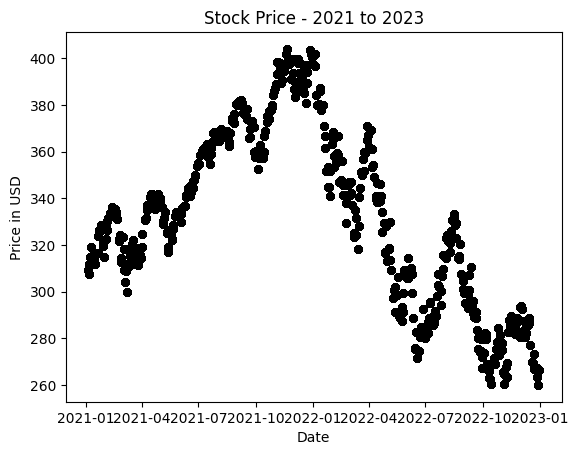

In [6]:
plt.scatter(
    pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("Stock Price - 2021 to 2023")

In [15]:
df_option_history = df_final.copy()

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True).apply(
    lambda x: pd.Timestamp(x).round(freq="D")
)

df_option_history.set_index(pd.DatetimeIndex(df_option_history.QUOTE_UNIXTIME), inplace=True)
df_option_history.sort_index(inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


def get_df_cnn_fear_greed_index():
    print("Retrieving historical ETF fear and greed index")
    import json

    with open("cnn_fear_greed_index_data.json") as f:
        cnn_fear_greed_index_data = json.load(f)

    df_fear_greed_index = pd.DataFrame(
        data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
    )
    df_fear_greed_index.set_index(
        pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
        inplace=True,
    )
    df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
    return df_fear_greed_index


df_fear_greed_index = get_df_cnn_fear_greed_index()
df_option_history = df_option_history.join(df_fear_greed_index[["fear_greed_index"]], how="inner")
df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)

df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
# df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST"]]
df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

CustomStrategy = ta.Strategy(
    name="RSI",
    ta=[
        {"kind": "rsi", "length": 14},
    ],
)
df_history.ta.strategy(CustomStrategy)

for column in ["close", "fear_greed_index", "RSI_14"]:
    for days in [14]:
        periods = days
        df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
        df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()

# df_option_history = df_option_history.join(df_history, how="inner")
df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")

df_option_history

Retrieving historical ETF fear and greed index


/var/folders/86/qt4jnsg167j7h7mqgbpp44kh0000gn/T/ipykernel_61436/89037139.py:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)


,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
2021-05-18 00:00:00+00:00,16.0,324.44,2021-05-24 20:00:00+00:00,7.00,0.00465,0.00148,0.00671,-0.00736,0.00084,0.20106,0.0,0.04,0.01,0.03,350.0,25.53,25.79,13.60,-0.94101,0.00229,0.05183,-0.09791,-0.02521,0.29068,1.0,25.6,0.079,6131412541494865814,34.8333,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,324.44,2021-12-17 21:00:00+00:00,214.04,0.69568,0.00533,0.86609,-0.05127,0.96302,0.26319,NaN,0.00,39.89,40.19,298.0,14.24,14.35,14.95,-0.30427,0.00525,0.86964,-0.05425,-0.66238,0.26523,2.0,26.4,0.081,3555014008451272518,34.8333,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,324.44,2021-09-30 20:00:00+00:00,136.00,0.86072,0.00309,0.42487,-0.04659,0.54449,0.31727,NaN,0.00,62.37,62.62,266.0,4.62,4.70,0.00,-0.13402,0.00342,0.42856,-0.05004,-0.17987,0.31902,NaN,58.4,0.180,300965125438327514,34.8333,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,324.44,2021-09-30 20:00:00+00:00,136.00,0.85790,0.00322,0.43227,-0.04769,0.55098,0.31686,NaN,0.00,61.53,61.78,267.0,4.74,4.81,5.75,-0.13709,0.00346,0.43564,-0.05060,-0.18355,0.31746,2.0,57.4,0.177,3775225776204748137,34.8333,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,324.44,2021-09-30 20:00:00+00:00,136.00,0.85480,0.00331,0.43801,-0.04849,0.55742,0.31444,NaN,0.00,60.61,60.87,268.0,4.85,4.93,5.23,-0.14004,0.00360,0.44262,-0.05172,-0.18823,0.31576,79.0,56.4,0.174,7778538633138444889,34.8333,324.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+00:00,16.0,266.35,2023-01-13 21:00:00+00:00,14.00,0.95796,0.00594,0.04827,-0.07202,0.09235,0.28666,NaN,0.00,24.91,25.12,242.0,0.44,0.47,0.59,-0.06028,0.00696,0.06468,-0.06577,-0.00616,0.31966,7.0,24.4,0.091,-7098559080131149958,38.3143,266.35,40.875729,260.05,288.72,35.5143,60.9429,32.894561,54.926318
2022-12-31 00:00:00+00:00,16.0,266.35,2023-01-13 21:00:00+00:00,14.00,0.95190,0.00658,0.05357,-0.07658,0.09284,0.28394,NaN,0.00,23.93,24.18,243.0,0.50,0.53,0.52,-0.06764,0.00765,0.06998,-0.07116,-0.00734,0.31788,43.0,23.4,0.088,1619514396356766987,38.3143,266.35,40.875729,260.05,288.72,35.5143,60.9429,32.894561,54.926318
2022-12-31 00:00:00+00:00,16.0,266.35,2023-01-13 21:00:00+00:00,14.00,0.94465,0.00738,0.05966,-0.08255,0.09248,0.28306,NaN,0.00,22.99,23.23,244.0,0.56,0.59,0.61,-0.07475,0.00832,0.07516,-0.07704,-0.00783,0.31499,42.0,22.4,0.084,-1668701013836749687,38.3143,266.35,40.875729,260.05,288.72,35.5143,60.9429,32.894561,54.926318
2022-12-31 00:00:00+00:00,16.0,266.35,2023-01-13 21:00:00+00:00,14.00,0.92401,0.00929,0.07642,-0.10012,0.09092,0.28807,NaN,0.00,21.19,21.39,246.0,0.71,0.74,0.90,-0.09118,0.00987,0.08812,-0.08862,-0.01053,0.31070,6.0,20.4,0.076,-7027571983546880985,38.3143,266.35,40.875729,260.05,288.72,35.5143,60.9429,32.894561,54.926318


<Axes: >

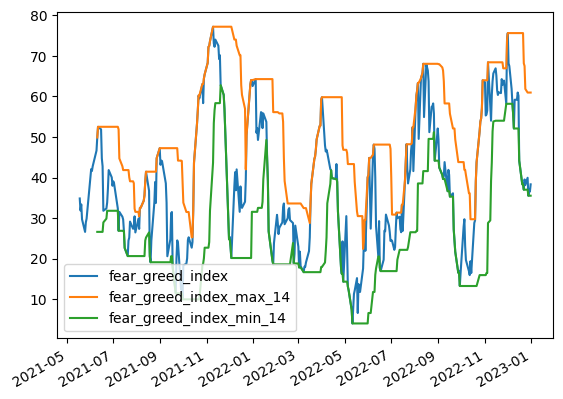

In [23]:
df_option_history[["fear_greed_index", "fear_greed_index_max_14", "fear_greed_index_min_14"]].plot()

In [21]:
df_option_history.describe().astype(str)

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
count,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1187860.0,950776.0,1250276.0,1250276.0,1250276.0,1251283.0,1250276.0,1250276.0,1250276.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1150101.0,944477.0,1251283.0,1251283.0,1251283.0,1251283.0,1251283.0,1194011.0,1198018.0,1198018.0,1198018.0,1198018.0,1145149.0,1145149.0
mean,16.0,333.55761660631515,125.86021589041012,0.4959345593522808,-0.3402047672269182,0.31563691785950926,-0.06514928423865744,0.5150492495782332,0.3479537798141194,95.16620528915328,22.02584754086299,35.468226335625104,35.94820853955446,335.394381207129,36.62841910106249,37.12461125383516,18.458575754473408,-0.49519334877881327,-1.7614258993049552,-4.26566592185781,-0.0956963835439305,-0.4380058879805765,0.3605252939524442,123.28936014323271,63.34454260147388,0.1933439094113801,9.435015152301597e+16,38.958375568676296,333.55761660631515,51.56705355341724,321.2833551833109,347.29735391287943,25.43417479904308,52.32407525913634,40.790344299784586,60.77471380968232
std,0.0,40.365464541896856,178.96205079368292,0.3840643649982143,387.2579668832034,6.580791531619121,0.07896054823677631,7.291470729122007,0.35271734918981157,943.7832168315631,40.85560746329899,50.02395993518455,50.45054526383128,85.83394419991916,53.87834055470308,54.3480892476342,36.60986432108486,0.3824286456278923,1977.3063876233666,56.51013861671685,0.7039459922511044,1.0349541597262477,0.29725572922441174,1186.4283933236243,60.1093728745954,0.1889601146197939,5.291092372809889e+18,16.611521160366063,40.365464541896856,13.379734326824552,39.84070952761892,38.433259394742585,13.95754878759653,14.3500171329425,11.014307186494252,11.123080980162415
min,16.0,260.05,0.0,0.0,-433189.70517,-1817.09995,-2.38038,-1777.13289,-0.0005,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,-1.0,-2211829.9611,-2156.70026,-43.52167,-34.59908,-0.0005,0.0,0.0,0.0,-9.22272192404093e+18,4.0286,260.05,23.209336423458275,260.05,282.17,4.0286,22.4,23.209336423458275,42.18860128411447
25%,16.0,293.57,15.0,0.05988,0.0006,0.02783,-0.0897,0.00905,0.22615,0.0,0.01,0.64,0.74,282.0,1.89,1.97,0.01,-0.90359,0.00055,0.03901,-0.09074,-0.40120500000000003,0.23403,0.0,19.6,0.059,-4.4926010184108283e+18,26.4667,293.57,40.87572930901406,285.67,310.71,16.6714,41.4333,32.03269029113405,52.28447676517976
50%,16.0,338.1,36.0,0.53302,0.00319,0.17911,-0.0437,0.09073,0.27744,1.0,2.45,13.98,14.36,335.0,14.49,14.83,2.99,-0.4718,0.00315,0.20066,-0.04318,-0.0869,0.29927,1.0,43.2,0.13,2.358872871472063e+17,37.2333,338.1,48.79869719180023,323.35,356.03,20.6,52.4,37.54478207396292,59.98020618167449
75%,16.0,366.59,176.96,0.89195,0.00772,0.4674,-0.01171,0.41932,0.35468,10.0,24.71,49.44,50.14,385.0,47.06,47.77,19.66,-0.09158,0.00756,0.49983,-0.01522,-0.00573,0.39863,17.0,89.2,0.27,4.670934641840189e+18,52.1429,366.59,62.18229664252697,354.7,378.34,32.5143,64.2571,48.2575025993181,69.36879030606221
max,16.0,403.41,942.04,1.0,2.26443,46.35949,0.0,263.72682,20.61525,98920.0,308.13,311.08,312.77,610.0,349.83,350.82,348.32,0.0,280.89887,64.76674,0.0,0.0,10.02792,251871.0,349.9,1.346,9.223346640782195e+18,77.1714,403.41,84.79897235588429,389.52,403.41,62.7714,77.1714,72.74370131501239,84.79897235588429


In [24]:
# df_option_history.loc[
#     (pd.to_datetime(df_option_history.index).tz_localize(None) == np.datetime64("2022-12-28"))
#     & ((df_option_history.C_VOLUME > 1000) | (df_option_history.P_VOLUME > 1000))
# ]

In [25]:
money = 5000
start_money = money
owned_options = []
last_index = df_option_history.index.values[-1]

for index, row in df_option_history.iterrows():
    expire_date = row.EXPIRE_UNIX.strftime(format="%Y-%m-%d")
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    max_buy_price = money / 10
    call_ask_price = row.C_ASK * 100
    call_bid_price = row.C_BID * 100
    put_ask_price = row.P_ASK * 100
    put_bid_price = row.P_BID * 100

    owned_options_not_sold = []

    good_call_buy = row.fear_greed_index == row.fear_greed_index_max_14
    good_put_buy = row.fear_greed_index == row.fear_greed_index_min_14

    for option in owned_options:
        if option["OPTION_ID"] == row.OPTION_ID:
            if option["side"] == "call" and (
                (option["DTE"] - row.DTE) > 7
                or row.DTE < 7
                # or option["C_ASK"] < row.C_BID
                or not good_call_buy
                or is_last_index
            ):
                money += call_bid_price
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_bid_price:.0f} {row.OPTION_ID}"
                )
            elif option["side"] == "put" and (
                (option["DTE"] - row.DTE) > 7
                or row.DTE < 7
                # or option["P_ASK"] < row.P_BID
                or not good_put_buy
                or is_last_index
            ):
                money += put_bid_price
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_bid_price:.0f} {row.OPTION_ID}"
                )
            else:
                owned_options_not_sold.append(option)
        else:
            owned_options_not_sold.append(option)

    owned_options = owned_options_not_sold

    if not is_last_index:
        if (
            good_call_buy
            and row.DTE > 14
            # and row.DTE < 30
            and row.C_VOLUME > 100
            and row.STRIKE_DISTANCE_PCT < 0.1
            # and row.STRIKE < row.UNDERLYING_LAST
            # and call_ask_price > 10
            and call_ask_price <= max_buy_price
            and money >= call_ask_price
            # and len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date]) == 0
        ):
            money -= call_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_ask_price:.0f} {row.OPTION_ID}"
            )
        elif (
            good_put_buy
            and row.DTE > 14
            # and row.DTE < 30
            and row.P_VOLUME > 100
            and row.STRIKE_DISTANCE_PCT < 0.1
            # and row.STRIKE > row.UNDERLYING_LAST
            # and put_ask_price > 10
            and put_ask_price <= max_buy_price
            and money >= put_ask_price
            # and len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date]) == 0
        ):
            money -= put_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_ask_price:.0f} {row.OPTION_ID}"
            )

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2021-06-10 $4541 1 buy call 2021-09-30 336.86 362.0 $459 5536855335973396007
2021-06-10 $4191 2 buy call 2021-09-17 336.86 364.0 $350 5709576699368747041
2021-06-10 $3794 3 buy call 2021-10-15 336.86 368.0 $397 8720709811327733130
2021-06-10 $3508 4 buy call 2021-07-16 336.86 348.0 $286 8993460147539716609
2021-06-10 $3278 5 buy call 2021-07-16 336.86 350.0 $230 6686281848339779756
2021-06-10 $3111 6 buy call 2021-07-16 336.86 353.0 $167 6265479513529377996
2021-06-10 $2978 7 buy call 2021-07-16 336.86 355.0 $133 -6751288232701091760
2021-06-10 $2860 8 buy call 2021-07-16 336.86 356.0 $118 1918858319949160791
2021-06-10 $2784 9 buy call 2021-07-16 336.86 360.0 $76 -6051079034485724953
2021-06-10 $2515 10 buy call 2021-08-20 336.86 360.0 $269 -2701090850308414601
2021-06-10 $2332 11 buy call 2021-08-20 336.86 365.0 $183 4529843417043403193
2021-06-10 $2228 12 buy call 2021-06-25 336.86 347.5 $104 -8128437578864147099
2021-06-10 $2131 13 buy call 2021-06-25 336.86 348.0 $97 -914451674916